`Pythonista - Saurus Ztrimus`

# Module 5 - Modern Portfolio Theory

## Modern Portfolio Theory
In this module, We’ll be looking at investment portfolio optimization with python, the fundamental concept of diversification and the creation of an efficient frontier that can be used by investors to choose specific mixes of assets based on investment goals; that is, the trade off between their desired level of portfolio return vs their desired level of portfolio risk.

[Modern Portfolio Theory](https://www.investopedia.com/terms/m/modernportfoliotheory.asp) suggests that it is possible to construct an "efficient frontier" of optimal portfolios, offering the maximum possible expected return for a given level of risk. It suggests that it is not enough to look at the expected risk and return of one particular stock. By investing in more than one stock, an investor can reap the benefits of diversification, particularly a reduction in the riskiness of the portfolio. MPT quantifies the benefits of diversification, also known as not putting all of your eggs in one basket.

## Resources
1. [Modern Portfolio Theory Explained, Part 1](https://www.youtube.com/watch?v=ML48st3rD04)
2. [Modern Portfolio Theory Explained, Part 2](https://www.youtube.com/watch?v=MOrGGuf6ik4)

<img src="../images/MPT_theory.png" alt="Drawing" style="width: 500px;"/> | <img src="../images/standard_deviation.png" alt="Drawing" style="width: 500px;"/>
- | - 
<img src="../images/normal_distribution_1.png" alt="Drawing" style="width: 500px;"/> | <img src="../images/normal_distribution_2.png" alt="Drawing" style="width: 500px;"/>
<img src="../images/correlation.png" alt="Drawing" style="width: 500px;"/> | <img src="../images/portfolio_optimization.png" alt="Drawing" style="width: 500px;"/>
<img src="../images/summary.png" alt="Drawing" style="width: 500px;"/> | <img src="../images/asset_allocation.png" alt="Drawing" style="width: 500px;"/>

## Problem Statements
- [Query 5.1](#id1)
- [Query 5.2](#id2)
- [Query 5.3](#id3)
- [Query 5.4](#id4)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <a id="id1">Query 5.1</a>
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [2]:
stock_data = pd.read_csv('./week2.csv', index_col = 0)
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data.set_index('Date', inplace = True)
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,0.000000,Slight or No change
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,0.362566,Slight or No change
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,-0.230366,Slight or No change
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,0.939337,Slight positive
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,-0.395113,Slight or No change


**We already have the Daily Returns(`Day_Perc_Change`) Column in `stock_data` Dataframe.**
**But it is in Percentage format**

In [3]:
stock_data.Day_Perc_Change = stock_data['Close Price'].pct_change(fill_method='ffill').fillna(0)
stock_data.Day_Perc_Change.head()

Date
2017-05-15    0.000000
2017-05-16    0.003626
2017-05-17   -0.002304
2017-05-18    0.009393
2017-05-19   -0.003951
Name: Day_Perc_Change, dtype: float64

#### 5.1.1 Mean Daily Return

In [4]:
# Avoiding first record. Because it's NaN value
daily_mean = stock_data[1:].Day_Perc_Change.mean()
round(daily_mean, 9)

-9.3718e-05

#### 5.1.2 Daily Standard Deviation of Returns

In [5]:
daily_std = stock_data[1:].Day_Perc_Change.std()
round(daily_std, 4)

0.0264

#### 5.1.3 Annual Mean

In [6]:
annual_mean = daily_mean*252
round(annual_mean, 4)

-0.0236

#### 5.1.4 Annual Standard Deviation

In [7]:
annual_std = daily_std*pd.np.sqrt(252)
round(annual_std, 4)

0.419

## <a id="id2">Query 5.2</a>
Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance ) 

In [8]:
asianpaint_stock = pd.read_csv("./ASIANPAINT.csv")
bajfinance_stock = pd.read_csv("./BAJFINANCE.csv")
hdfc_stock = pd.read_csv("./HDFCBANK.csv")
hindunilvr_stock = pd.read_csv("./HINDUNILVR.csv")
titan_stock = pd.read_csv("./TITAN.csv")

In [9]:
asianpaint_stock = asianpaint_stock[asianpaint_stock.Series == 'EQ'].reset_index(drop=True)
bajfinance_stock = bajfinance_stock[bajfinance_stock.Series == 'EQ'].reset_index(drop=True)
hdfc_stock = hdfc_stock[hdfc_stock.Series == 'EQ'].reset_index(drop=True)
hindunilvr_stock = hindunilvr_stock[hindunilvr_stock.Series == 'EQ'].reset_index(drop=True)
titan_stock = titan_stock[titan_stock.Series == 'EQ'].reset_index(drop=True)

In [10]:
close_price_stock = pd.DataFrame({asianpaint_stock.Symbol[0] : asianpaint_stock["Close Price"],
                                  bajfinance_stock.Symbol[0] : bajfinance_stock["Close Price"],
                                  hdfc_stock.Symbol[0] : hdfc_stock["Close Price"],
                                  hindunilvr_stock.Symbol[0] : hindunilvr_stock["Close Price"],
                                  titan_stock.Symbol[0] : titan_stock["Close Price"]})
close_price_stock.tail()

,ASIANPAINT,BAJFINANCE,HDFCBANK,HINDUNILVR,TITAN
489,1387.80,3017.05,2322.35,1697.50,1086.50
490,1385.70,2921.30,2307.25,1688.70,1088.70
491,1354.20,2971.35,2290.90,1703.75,1104.45
492,1341.05,2922.85,2296.50,1687.45,1132.10
493,1332.50,2931.85,2287.20,1702.00,1144.70


In [11]:
close_price_stock.shape

(494, 5)

#### 5.2.1 Daily Returns

In [12]:
daily_returns = close_price_stock.pct_change(fill_method='ffill').dropna()
# daily_returns.head()

#### 5.2.2 Mean Daily Returns

In [13]:
daily_mean_returns = daily_returns.mean()
daily_mean_returns

ASIANPAINT    0.000389
BAJFINANCE    0.001803
HDFCBANK      0.000830
HINDUNILVR    0.001188
TITAN         0.001951
dtype: float64

#### 5.2.3 20% Weightage for each Stock

In [14]:
weights = pd.np.array([0.2]*5)
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

#### 5.2.4 Annual Mean Returns for Portfolio

In [15]:
annual_returns = (daily_mean_returns * weights).sum() * 252
round(annual_returns,4)

0.3105

#### 5.2.5 Covariance Matrix

In [16]:
covariance = daily_returns.cov()
covariance

,ASIANPAINT,BAJFINANCE,HDFCBANK,HINDUNILVR,TITAN
ASIANPAINT,0.000174,0.000068,0.000036,0.000048,0.000057
BAJFINANCE,0.000068,0.000409,0.000055,0.000047,0.000063
HDFCBANK,0.000036,0.000055,0.000090,0.000028,0.000031
HINDUNILVR,0.000048,0.000047,0.000028,0.000149,0.000056
TITAN,0.000057,0.000063,0.000031,0.000056,0.000419


#### 5.2.6 Annual Standard Deviation (Volatility)

### Procedure To Calculate Annual Standard Deviation
- Volatility for entire portfolio can meansure by [Portfolio Standard Deviation](http://financialmanagementpro.com/standard-deviation-of-portfolio/) formula.
- It depends on Three Factors
    1. Weightage of each asset/stock
    2. Standard deviation of each asset
    3. Covariance between pair of assets
    
#### Formula
$$σ_{p} = \sqrt{\sum_{i=1}^{N}W_{i}^2\cdotσ^2(k_{i}){+}\sum_{i=1}^{N}\sum_{j\neq i}^{N}W_{i}\cdot{W_{j}}\cdot{Cov(k_{i},k_{j})}}$$

 - **$σ_{p}$** = Portfolio Standard Deviation
 - **N** = number of assets in a portfolio, 
 - **$W_{i}$** = Weight/proportion of ith asset in a portfolio, 
 - **$W_{j}$** = proportion of jth asset in a portfolio, 
 - **$σ^2(k_{i})$** =  variance of return of ith asset
 - **$Cov(k_{i},k_{j})$** = covariance of returns of ith asset and jth asset.
 
 
 **Variance of one asset is covariance between same asset.so formula become,**<br><br>
 $$σ_{p} = \sqrt{\sum_{i=1}^{N}W_{i}\cdot{W_{i}}\cdot{Cov(k_{i}, k_{i}}){+}\sum_{i=1}^{N}\sum_{j\neq i}^{N}W_{i}\cdot{W_{j}}\cdot{Cov(k_{i},k_{j})}}$$
 <br>**Now, Our weights for all assets are same. 0.2....... Therefore**<br><br>
 $$σ_{p} = \sqrt{\sum_{i=1}^{N}0.2\cdot{0.2}\cdot{Cov(k_{i}, k_{i}}){+}\sum_{i=1}^{N}\sum_{j\neq i}^{N}0.2\cdot{0.2}\cdot{Cov(k_{i},k_{j})}}$$
 <br>**So both parts are same, Now**<br><br>
 $$σ_{p} = \sqrt{\sum_{i=1}^{N}\sum_{j=i}^{N}0.2\cdot{0.2}\cdot{Cov(k_{i},k_{j})}}$$

In [17]:
weight = 0.2 # weights[0]
portfolio_std_dev = 0
for i in range(len(covariance)):
    for j in range(len(covariance)):
        portfolio_std_dev += weight * weight * covariance.iloc[i,j]

portfolio_std_dev = pd.np.sqrt(portfolio_std_dev)
        
annual_std = portfolio_std_dev*pd.np.sqrt(252)
round(annual_std, 4)

# Alternative Generalize method
# annual_std = pd.np.sqrt(pd.np.dot(weights,pd.np.dot(weights, covariance))) * pd.np.sqrt(252)
# round(annual_std, 4)

0.1495

## <a id="id3">Query 5.3</a>
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [18]:
# To get the same random numbers every time for reproducibility.
pd.np.random.seed(42)
# Number of Different Portfolios considered
portfolio_num = 8000
# To save all weightage of all portfolios
all_weights = pd.np.zeros((portfolio_num, len(covariance)))
# Array for storing Returns, Volatility and Sharpe Ratio for specific Portfolio
ret_vol_sharpe = pd.np.zeros((portfolio_num, 3))

#### 5.3.1 Calculate The Returns, Volatility and Sharpe Ratio for Different Possible Portfolio

In [19]:
for i in range(portfolio_num):
    # Random Weights for 5 different assets in portfolio
    weights = pd.np.random.random(5)
    weights /= weights.sum()
    # Save weights
    all_weights[i,:] = weights
    
    # calculate Portfolio Returns
    ret_vol_sharpe[i,0] = (daily_mean_returns * weights).sum() * 252
    # calculate Portfolio Volatility
    ret_vol_sharpe[i,1] = pd.np.sqrt(pd.np.dot(weights,pd.np.dot(weights, covariance))) * pd.np.sqrt(252)
    # calculate Sharpe Ratio
    ret_vol_sharpe[i,2] = ret_vol_sharpe[i,0] / ret_vol_sharpe[i,1]

ret_vol_sharpe = pd.DataFrame(ret_vol_sharpe, columns=['Returns', 'Volatility', 'Sharpe_Ratio'])

#### 5.3.3 Scatter Plot

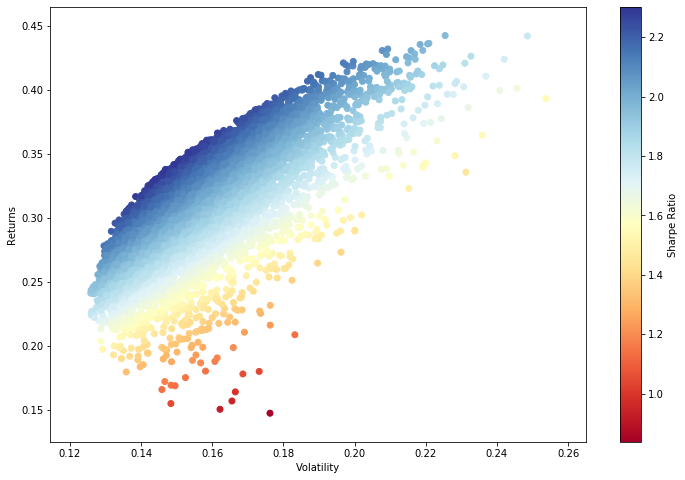

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(ret_vol_sharpe.Volatility, ret_vol_sharpe.Returns, c=ret_vol_sharpe.Sharpe_Ratio, cmap='RdYlBu')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

## <a id="id4">Query 5.4</a>
Mark the 2 portfolios where -
- Portfolio 1 - The Sharpe ratio is the highest
- Portfolio 2 - The volatility is the lowest. 

<img src="../images/15.png" alt="Drawing" style="width: 700px;" align="left"/>

#### 5.4.1 Portfolio 1 - The Sharpe ratio is the highest

In [21]:
high_sharpe_ratio_idx = ret_vol_sharpe.Sharpe_Ratio.idxmax()
high_sharpe_ratio_returns = ret_vol_sharpe.Returns[high_sharpe_ratio_idx]
high_sharpe_ratio_volatility = ret_vol_sharpe.Volatility[high_sharpe_ratio_idx]

print(f"Max Sharpe Ratio : {ret_vol_sharpe.Sharpe_Ratio.max()}")
print(f"It's Location at : {high_sharpe_ratio_idx}")
print("Weights for Best Portfolio : ", all_weights[high_sharpe_ratio_idx,:])

Max Sharpe Ratio : 2.301825228380571
It's Location at : 831
Weights for Best Portfolio :  [0.00440529 0.18454587 0.29072094 0.3270908  0.19323711]


#### 5.4.2 Portfolio 2 - The volatility is the lowest. 

In [22]:
low_volatility = ret_vol_sharpe.Volatility.min()
low_volatility_idx = ret_vol_sharpe.Volatility.idxmin()
low_volatility_returns = ret_vol_sharpe.Returns[low_volatility_idx]

print(f"Low Volatility : {low_volatility}")
print(f"Low Volatility Location : {low_volatility_idx}")
print(f"Weights for Low Volatility : {all_weights[low_volatility_idx,:]}")

Low Volatility : 0.12583883177418315
Low Volatility Location : 6583
Weights for Low Volatility : [0.16604141 0.04267851 0.48017087 0.24798249 0.06312672]


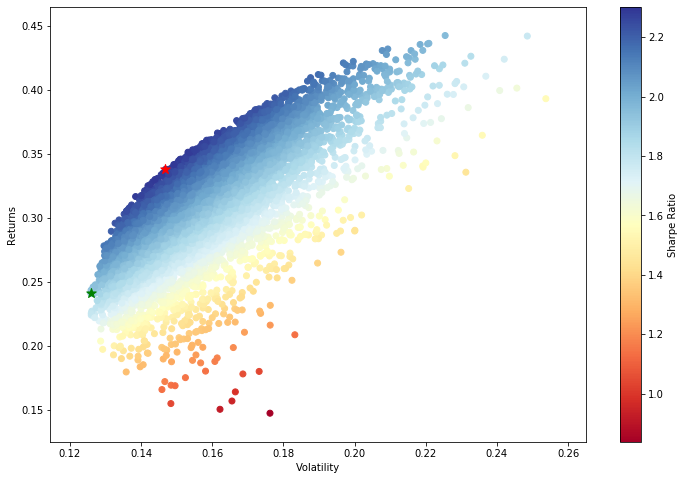

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(ret_vol_sharpe.Volatility, ret_vol_sharpe.Returns, c=ret_vol_sharpe.Sharpe_Ratio, cmap='RdYlBu')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Volatility')
plt.ylabel('Returns')
# Best Portfolio
plt.scatter(high_sharpe_ratio_volatility, high_sharpe_ratio_returns, c='r', s=100, marker='*')
# Low Volatility : Low risk
plt.scatter(low_volatility, low_volatility_returns, c='g', s=100, marker='*')
plt.show()

### CAPM Model use for Systematic risk
### While MPT theory used for both Systematic and Unsystematic Risk